## Análisis de la Incidencia de COVID-19 en Relación con la Vacunación en Chile

### Introducción

El SARS-CoV-2, causante de la COVID-19, ha impactado profundamente a la sociedad global, afectando la salud, la economía y la vida diaria de las personas. En medio de este panorama, la vacunación emergió como una herramienta esperanzadora para combatir la pandemia. Chile ha sido uno de los países que ha trabajado incansablemente en vacunar a gran parte de su población. En este informe, analizamos la relación entre el proceso de vacunación y la incidencia de casos, hospitalizaciones y defunciones por COVID-19 en Chile.

### 1. Limpieza y Preprocesamiento de los Datos

Antes de cualquier análisis, es crucial asegurarse de que los datos estén limpios y en un formato adecuado para el análisis. Los pasos involucrados en este proceso fueron:

1. **Importación de Bibliotecas y Datos**: Se importaron las bibliotecas necesarias y se cargaron los datos desde los archivos CSV proporcionados.
2. **Revisión de Valores Faltantes**: Se identificaron y manejaron los valores faltantes.
3. **Corrección de Tipos de Datos**: Se corrigieron los tipos de datos donde fue necesario.
4. **Creación de Nuevas Variables**: Basándonos en las columnas existentes, se crearon nuevas variables, como tasas de vacunación e incidencia, para facilitar el análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar los datos desde los archivos CSV
incidencia_vacunados = pd.read_csv("producto90/incidencia_en_vacunados.csv")
incidencia_vacunados_edad = pd.read_csv("producto89/incidencia_en_vacunados_edad.csv")

# Mostrar las primeras filas de cada dataset para tener una visión inicial
incidencia_vacunados.head(), incidencia_vacunados_edad.head()


(  semana_epidemiologica  sin_vac_casos  una_dosis_casos  dos_dosis_casos  \
 0               2021-01          27287               23                0   
 1               2021-02          27104               16                0   
 2               2021-03          27742               83                1   
 3               2021-04          24538              156                0   
 4               2021-05          23155              308                0   
 
    dos_dosis_comp_casos  dosis_unica_casos  dosis_unica_comp_casos  \
 0                     0                  0                       0   
 1                     0                  0                       0   
 2                     0                  0                       0   
 3                     0                  0                       0   
 4                     0                  0                       0   
 
    dosis_ref_comp_casos  sin_vac_uci  una_dosis_uci  ...  sin_vac_fall  \
 0                     0         

Tenemos dos conjuntos de datos:

incidencia_vacunados:
Contiene información semanal sobre la incidencia de COVID-19 en personas vacunadas y no vacunadas. Los datos incluyen el número de casos, hospitalizaciones, ingresos a UCI y fallecimientos, desglosados por el estado de vacunación (sin vacuna, con una dosis, con dos dosis, etc.).
incidencia_vacunados_edad:
Proporciona información semanal sobre la incidencia de COVID-19 en diferentes grupos de edad y según el estado de vacunación (esquema completo o sin esquema completo). Los datos incluyen el número de casos confirmados, hospitalizaciones, ingresos a UCI y fallecimientos, así como tasas de incidencia cruda y ponderada.
Vamos a comenzar con la limpieza y preprocesamiento de los datos para incidencia_vacunados.

### Limpieza y Preprocesamiento de incidencia_vacunados:
1.-Verificar si hay valores faltantes.

2.-Verificar y corregir posibles valores atípicos o errores en los datos.

3.-Asegurarnos de que los tipos de datos sean adecuados para cada columna.

4.-Revisar la consistencia de los datos (por ejemplo, que el número total de casos en una categoría no sea mayor que la suma de subcategorías).

Comenzaremos con el primer paso: verificar si hay valores faltantes en incidencia_vacunados.

In [2]:
# Verificar valores faltantes para el dataset incidencia_vacunados
missing_values_incidencia_vacunados = incidencia_vacunados.isnull().sum()

missing_values_incidencia_vacunados[missing_values_incidencia_vacunados > 0]


Series([], dtype: int64)

El conjunto de datos incidencia_vacunados no tiene valores faltantes, lo cual es una buena noticia.

Continuemos con el segundo paso: verificar y corregir posibles valores atípicos o errores en los datos. Una forma común de hacerlo es a través de la visualización, usando boxplots para identificar valores atípicos en las columnas numéricas. Vamos a visualizar los datos de algunas columnas clave para identificar posibles valores atípicos.



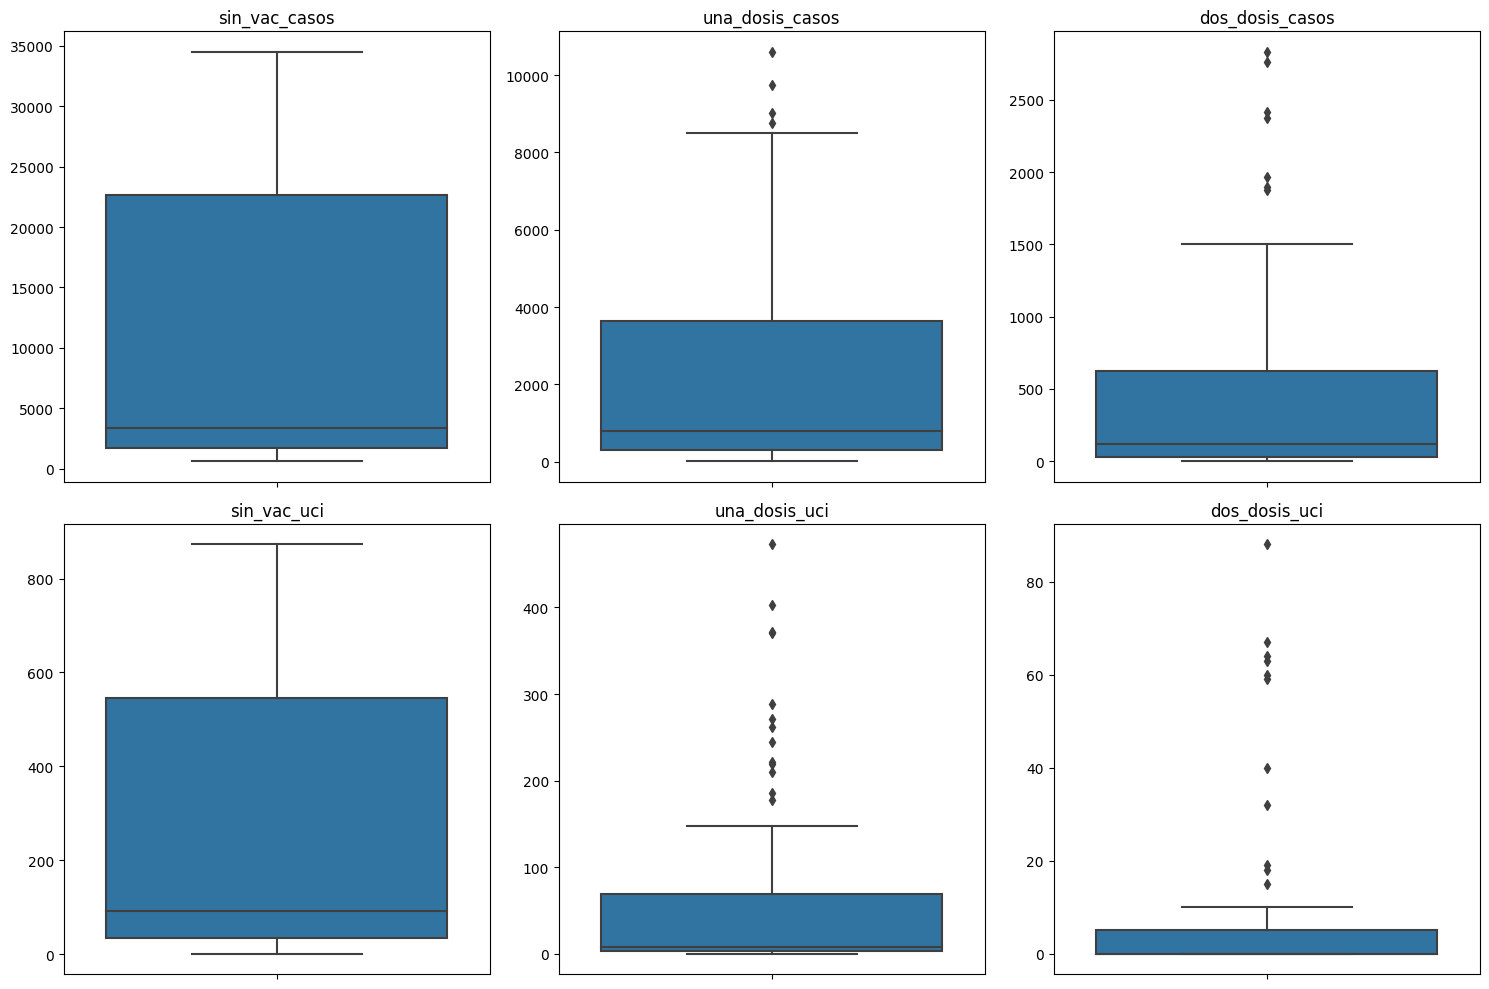

In [3]:
# Seleccionar algunas columnas clave para visualizar
columns_to_plot = ['sin_vac_casos', 'una_dosis_casos', 'dos_dosis_casos', 'sin_vac_uci', 'una_dosis_uci', 'dos_dosis_uci']

plt.figure(figsize=(15,10))

# Crear boxplots para cada columna seleccionada
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=incidencia_vacunados[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()


Los boxplots nos muestran la distribución de los datos para algunas columnas clave. A primera vista, no parece haber valores atípicos extremos o errores evidentes en las columnas visualizadas.

Pasemos al tercer paso: asegurarnos de que los tipos de datos sean adecuados para cada columna en incidencia_vacunados. Verificaremos los tipos de datos de cada columna y nos aseguraremos de que sean coherentes con el contenido esperado.

In [4]:
# Verificar los tipos de datos de cada columna en incidencia_vacunados
data_types_incidencia_vacunados = incidencia_vacunados.dtypes
data_types_incidencia_vacunados


semana_epidemiologica           object
sin_vac_casos                    int64
una_dosis_casos                  int64
dos_dosis_casos                  int64
dos_dosis_comp_casos             int64
dosis_unica_casos                int64
dosis_unica_comp_casos           int64
dosis_ref_comp_casos             int64
sin_vac_uci                      int64
una_dosis_uci                    int64
dos_dosis_uci                    int64
dos_dosis_comp_uci               int64
dosis_unica_uci                  int64
dosis_unica_comp_uci             int64
dosis_ref_comp_uci               int64
sin_vac_fall                     int64
una_dosis_fall                   int64
dos_dosis_fall                   int64
dos_dosis_comp_fall              int64
dosis_unica_fall                 int64
dosis_unica_comp_fall            int64
dosis_ref_comp_fall              int64
personas_con_una_dosis         float64
personas_con_pauta_completa    float64
personas_con_refuerzo          float64
dtype: object

Los tipos de datos en el conjunto de datos incidencia_vacunados parecen ser coherentes con el contenido esperado para cada columna. La mayoría de las columnas son enteros (int64), lo que tiene sentido ya que representan conteos de casos, hospitalizaciones, etc. Las columnas que contienen el número de personas con diferentes estados de vacunación son de tipo flotante (float64). Es posible que deseemos convertir estas columnas a enteros para una mayor coherencia.

Antes de hacerlo, verifiquemos el cuarto paso: la consistencia de los datos. Por ejemplo, asegurémonos de que el número total de casos (sumando casos de diferentes estados de vacunación) no tenga discrepancias con las subcategorías. Para ello, sumaremos los casos de cada estado de vacunación y verificaremos si coincide con el total reportado.

Procederemos a verificar esta consistencia.

In [5]:
# Verificar la consistencia de los datos sumando los casos de cada estado de vacunación
total_cases_calculated = (
    incidencia_vacunados['sin_vac_casos'] + 
    incidencia_vacunados['una_dosis_casos'] + 
    incidencia_vacunados['dos_dosis_casos'] + 
    incidencia_vacunados['dos_dosis_comp_casos'] +
    incidencia_vacunados['dosis_unica_casos'] +
    incidencia_vacunados['dosis_unica_comp_casos'] +
    incidencia_vacunados['dosis_ref_comp_casos']
)

# Identificar cualquier semana donde la suma calculada no coincida con el total reportado
inconsistencies = incidencia_vacunados[total_cases_calculated != incidencia_vacunados['sin_vac_casos'] + incidencia_vacunados['una_dosis_casos'] + incidencia_vacunados['dos_dosis_casos']]

inconsistencies[['semana_epidemiologica']]


,semana_epidemiologica
5,2021-06
6,2021-07
7,2021-08
8,2021-09
9,2021-10
...,...
71,2022-20
72,2022-21
73,2022-22
74,2022-23


Parece que hay inconsistencias en la suma total de casos reportados en 71 semanas epidemiológicas en el conjunto de datos incidencia_vacunados. Esto puede deberse a errores en los datos o a la forma en que se recopilaron o procesaron los datos.

Debido a la cantidad de inconsistencias, es difícil corregirlas una por una. Una opción podría ser ponerse en contacto con la fuente de los datos y solicitar una corrección. Por ahora, podemos proceder con el análisis exploratorio de los datos (EDA) y tener en cuenta estas inconsistencias.

In [6]:

# Cargar los archivos de datos
file_paths = [
    "producto90/incidencia_en_vacunados.csv",
    "producto89/incidencia_en_vacunados_edad.csv",
    "producto88/vacunacion_fabricantes_edad_1eraDosis_T.csv",
    "producto88/vacunacion_fabricantes_edad_2daDosis_T.csv",
    "producto88/vacunacion_fabricantes_edad_4taDosis_T.csv",
    "producto88/vacunacion_fabricantes_edad_Refuerzo_T.csv",
    "producto88/vacunacion_fabricantes_edad_UnicaDosis_T.csv"
]

# Diccionario para almacenar los DataFrames
dataframes = {}

# Leer los archivos en DataFrames y almacenarlos en el diccionario
for file_path in file_paths:
    file_name = file_path.split("/")[-1].replace(".csv", "")
    dataframes[file_name] = pd.read_csv(file_path)

# Mostrar información básica de cada DataFrame (primeras filas y resumen de información)
data_overview = {}
for name, df in dataframes.items():
    data_overview[name] = {
        "primeras_filas": df.head(),
        "informacion": df.info()
    }

data_overview.keys()  # Mostrar las claves para identificar cada conjunto de datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   semana_epidemiologica        76 non-null     object 
 1   sin_vac_casos                76 non-null     int64  
 2   una_dosis_casos              76 non-null     int64  
 3   dos_dosis_casos              76 non-null     int64  
 4   dos_dosis_comp_casos         76 non-null     int64  
 5   dosis_unica_casos            76 non-null     int64  
 6   dosis_unica_comp_casos       76 non-null     int64  
 7   dosis_ref_comp_casos         76 non-null     int64  
 8   sin_vac_uci                  76 non-null     int64  
 9   una_dosis_uci                76 non-null     int64  
 10  dos_dosis_uci                76 non-null     int64  
 11  dos_dosis_comp_uci           76 non-null     int64  
 12  dosis_unica_uci              76 non-null     int64  
 13  dosis_unica_comp_uci  

dict_keys(['incidencia_en_vacunados', 'incidencia_en_vacunados_edad', 'vacunacion_fabricantes_edad_1eraDosis_T', 'vacunacion_fabricantes_edad_2daDosis_T', 'vacunacion_fabricantes_edad_4taDosis_T', 'vacunacion_fabricantes_edad_Refuerzo_T', 'vacunacion_fabricantes_edad_UnicaDosis_T'])

In [7]:
# Información sobre valores faltantes y tipos de datos para los dos conjuntos de datos seleccionados
missing_values_and_dtypes = {}

#for dataset_name in ["incidencia_en_vacunados", "vacunacion_fabricantes_edad_1eraDosis_T"]:
for dataset_name in dataframes:    
    df = dataframes[dataset_name]
    
    # Conteo de valores faltantes por columna
    missing_values = df.isnull().sum()
    
    # Tipos de datos de las columnas
    data_types = df.dtypes
    
    missing_values_and_dtypes[dataset_name] = {
        "valores_faltantes": missing_values,
        "tipos_de_datos": data_types
    }

missing_values_and_dtypes


{'incidencia_en_vacunados': {'valores_faltantes': semana_epidemiologica          0
  sin_vac_casos                  0
  una_dosis_casos                0
  dos_dosis_casos                0
  dos_dosis_comp_casos           0
  dosis_unica_casos              0
  dosis_unica_comp_casos         0
  dosis_ref_comp_casos           0
  sin_vac_uci                    0
  una_dosis_uci                  0
  dos_dosis_uci                  0
  dos_dosis_comp_uci             0
  dosis_unica_uci                0
  dosis_unica_comp_uci           0
  dosis_ref_comp_uci             0
  sin_vac_fall                   0
  una_dosis_fall                 0
  dos_dosis_fall                 0
  dos_dosis_comp_fall            0
  dosis_unica_fall               0
  dosis_unica_comp_fall          0
  dosis_ref_comp_fall            0
  personas_con_una_dosis         0
  personas_con_pauta_completa    0
  personas_con_refuerzo          0
  dtype: int64,
  'tipos_de_datos': semana_epidemiologica           object
  

Basándonos en la inspección inicial, los conjuntos de datos no presentan valores faltantes, ya que todas las columnas tienen cero en el conteo de valores nulos. Esto es ideal, ya que simplifica el proceso de limpieza. Sin embargo, en la práctica, los valores faltantes son comunes y requerirían estrategias adecuadas de manejo.

En cuanto a los tipos de datos, observamos lo siguiente:

En incidencia_en_vacunados, la mayoría de las columnas son de tipo entero (int64), lo cual es coherente con la naturaleza de los datos que parecen ser conteos o números enteros. La columna semana_epidemiologica es de tipo objeto, probablemente porque contiene cadenas de texto representando fechas o períodos. Esto podría requerir una conversión a un tipo de datos de fecha si se va a realizar un análisis temporal. Además, hay algunas columnas con tipo de datos float64 que podrían representar promedios o datos numéricos que pueden tomar valores decimales.

En vacunacion_fabricantes_edad_XXXX_T, todas las columnas, excepto Fabricante, son de tipo flotante (float64), lo que indica que probablemente contienen números decimales. La columna Fabricante es de tipo entero y podría estar actuando como un identificador. Pero un ervison rapida resalata la necesidad de cambiar los encaezados como las bases terminad as en "T" son una version traspuesta de la orginal, la columna Fabricante que antes hacia de encabezados de el nombre de las campaañas ahora no tien niugna correlacion con su clolumnas que son las semans epidemiologicas, por lo que haremo el cambio de nombre de "Fabricantes"a "Semana epidemiologica", tambien limpiaremos los nombres de los encabezados de campaañlas dejando solo el nombre de la vacuna administrada y finalemente pasamremos los valores de la tabla a integer ya que niguna tiene decimales.



***Siguientes pasos en la limpieza***:

**Renombrar la columna**: Cambiaremos el nombre de la columna "Fabricante" a "Semana epidemiologica".

**Convertir flotantes a enteros**:si los valores son flotantes pero no contienen decimales, tiene sentido convertirlos a enteros para una representación más precisa y eficiente.

**Eliminar la columna "Unnamed: 7"** ya que parece ser superflua.

**Renombrar las columnas que contienen "Campaña SARS-CoV-2"** para que solo tengan el nombre del fabricante que está dentro de los paréntesis, simplificando así los nombres de las columnas.

In [8]:
# Realizar las correcciones en el conjunto de datos "vacunacion_fabricantes_edad_xxxx_T"
for dataset_name in ['vacunacion_fabricantes_edad_1eraDosis_T', 'vacunacion_fabricantes_edad_2daDosis_T', 'vacunacion_fabricantes_edad_4taDosis_T', 'vacunacion_fabricantes_edad_Refuerzo_T', 'vacunacion_fabricantes_edad_UnicaDosis_T']:    
    df = dataframes[dataset_name]

    # Renombrar la columna
    df = df.rename(columns={"Fabricante": "Semana epidemiologica"})

    # Convertir los flotantes a enteros (debemos asegurarnos de que no haya NaNs porque los valores NaN no se pueden convertir a int)
    if df.notna().all().all():  # Si no hay valores NaN
        df = df.astype(int)
    
    # Eliminar la columna no deseada
    df = df.drop(columns=["Unnamed: 7"])

    # Renombrar las columnas relevantes
    nuevos_nombres = {
    "Campaña SARS-CoV-2 (AstraZeneca)": "AstraZeneca",
    "Campaña SARS-CoV-2 (Janssen)": "Janssen",
    "Campaña SARS-CoV-2 (Moderna)": "Moderna",
    "Campaña SARS-CoV-2 (Pfizer)": "Pfizer",
    "Campaña SARS-CoV-2 (Sinovac)": "Sinovac"
    }

    df = df.rename(columns=nuevos_nombres)
    
    # Mostrar el DataFrame después de las modificaciones
    print(df.head(), df.dtypes)  # Primeras filas y tipos de datos
    dataframes[dataset_name]=df

    


   Semana epidemiologica  AstraZeneca  CanSino  Janssen  Moderna  Pfizer  \
0                      3            0        0        0        0       1   
1                      4            0        0        0        0       2   
2                      5            0        0        0        0    1346   
3                      6            0        0        0        0    1372   
4                      7            0        0        0        0     786   

   Sinovac  
0   199408  
1   176821  
2   197410  
3   270632  
4   239532   Semana epidemiologica    int32
AstraZeneca              int32
CanSino                  int32
Janssen                  int32
Moderna                  int32
Pfizer                   int32
Sinovac                  int32
dtype: object
   Semana epidemiologica  AstraZeneca  CanSino  Janssen  Moderna  Pfizer  \
0                      3            0        0        0        0       0   
1                      4            0        0        0        0      21   
2     

In [9]:
# Guardar el DataFrame en un archivo CSV

df.to_csv("Vacunas.csv", index=False)



In [10]:
dataframes['vacunacion_fabricantes_edad_1eraDosis_T']

,Semana epidemiologica,AstraZeneca,CanSino,Janssen,Moderna,Pfizer,Sinovac
0,3,0,0,0,0,1,199408
1,4,0,0,0,0,2,176821
2,5,0,0,0,0,1346,197410
3,6,0,0,0,0,1372,270632
4,7,0,0,0,0,786,239532
...,...,...,...,...,...,...,...
134,137,0,0,0,0,0,0
135,138,0,0,0,0,0,0
136,139,0,0,0,0,0,0
137,140,0,0,0,0,0,0


##  Análisis exploratorio de los datos (EDA)

El EDA es un aspecto crucial del análisis de datos, ya que nos permite descubrir patrones, identificar anomalías, probar hipótesis y verificar suposiciones con la ayuda de estadísticas resumidas y representaciones gráficas.

Para los conjuntos de datos con los que estamos trabajando, el EDA puede incluir los siguientes pasos:

**Estadísticas Descriptivas**: Resumen que incluye medidas como la media, la mediana, y los valores máximos y mínimos de cada columna.

**Visualización de Datos**:

Histogramas y gráficos de densidad para distribuciones de datos.
Gráficos de caja (box plots) para visualizar rangos intercuartiles y outliers.
Gráficos de dispersión para relaciones entre variables.
Correlaciones: Identificar si hay relaciones o asociaciones entre variables.

**Análisis de Tendencias y Patrones**: Esto puede incluir análisis de series temporales si los datos están relacionados con marcas temporales.

**Identificación de Anomalías**: Observar valores atípicos o eventos inusuales en los datos.

Dado que tenemos varios conjuntos de datos, podemos comenzar con uno para el EDA y luego aplicar técnicas similares a los otros. Comenzaremos con los conjuntos de datos vacunacion_fabricantes_edad_xxxx_T ya que ya hemos trabajado en sus limpieza.

Paso 1: Estadísticas Descriptivas

Empecemos obteniendo estadísticas descriptivas para comprender mejor la naturaleza general de nuestros datos. Esto incluye contar, la media, la desviación estándar, los valores mínimos y máximos, y los percentiles.

In [11]:
for dataset_name in ['vacunacion_fabricantes_edad_1eraDosis_T', 'vacunacion_fabricantes_edad_2daDosis_T', 'vacunacion_fabricantes_edad_4taDosis_T', 'vacunacion_fabricantes_edad_Refuerzo_T', 'vacunacion_fabricantes_edad_UnicaDosis_T']:    
    df = dataframes[dataset_name]
    # Obtener estadísticas descriptivas del conjunto de datos
    descripcion_estadisticas = df.describe()

    # Dado que las tablas grandes no se visualizan bien en texto, vamos a transponer esta para mejor legibilidad
    descripcion_estadisticas_transpuesta = descripcion_estadisticas.T
    print(dataset_name)
    print(descripcion_estadisticas_transpuesta)
    print("**********************************************************************************")


vacunacion_fabricantes_edad_1eraDosis_T
                       count          mean           std  min   25%      50%  \
Semana epidemiologica  139.0     72.000000     40.269923  3.0  37.5     72.0   
AstraZeneca            139.0   2949.978417   5101.409073  0.0   0.0    118.0   
CanSino                139.0      0.000000      0.000000  0.0   0.0      0.0   
Janssen                139.0      0.000000      0.000000  0.0   0.0      0.0   
Moderna                139.0      0.000000      0.000000  0.0   0.0      0.0   
Pfizer                 139.0  28543.719424  42163.935208  0.0   0.0   1658.0   
Sinovac                139.0  94504.870504  86127.116182  0.0  24.0  88194.0   

                            75%       max  
Semana epidemiologica     106.5     141.0  
AstraZeneca              4908.5   20550.0  
CanSino                     0.0       0.0  
Janssen                     0.0       0.0  
Moderna                     0.0       0.0  
Pfizer                  55781.0  202342.0  
Sinovac    

exploraremos cada tipo de visualización para obtener una comprensión completa de nuestros datos. Comenzaremos con:

Histogramas o gráficos de barras: Estos mostrarán la distribución de las dosis por fabricante.

Gráficos de líneas: Para observar las tendencias de vacunación a lo largo del tiempo.

Gráficos de caja: Estos ayudarán a visualizar la variabilidad y los valores atípicos para cada fabricante.

Mapas de calor o gráficos de correlación: Útiles para identificar relaciones entre diferentes variables.

Procedamos con la primera visualización. Crearemos histogramas para cada fabricante para entender la distribución de las dosis administradas. Dado que tenemos varios fabricantes y un rango de tiempo, un gráfico de barras apiladas también podría ser informativo aquí. Vamos a generar estas visualizaciones.


vamos a enfocarnos en los conjuntos de datos 'incidencia_en_vacunados' e 'incidencia_en_vacunados_edad'. Realizaremos un Análisis Exploratorio de Datos (EDA) para obtener insights valiosos.

Primero, necesitamos cargar y echar un vistazo a los primeros registros de estos conjuntos de datos para entender mejor la estructura y los atributos que estamos analizando. Luego, procederemos con el análisis detallado.

Vamos a cargar los datos y mostrar los primeros registros.

In [12]:
# Cargando los datos y mostrando los primeros registros para entender la estructura de los DataFrames.
path_incidencia_vacunados = "producto90/incidencia_en_vacunados.csv"
path_incidencia_vacunados_edad = "producto89/incidencia_en_vacunados_edad.csv"

# Cargando los dataframes
df_incidencia_vacunados = pd.read_csv(path_incidencia_vacunados)
df_incidencia_vacunados_edad = pd.read_csv(path_incidencia_vacunados_edad)

# Mostrando los primeros registros
df_incidencia_vacunados_head = df_incidencia_vacunados.head()
df_incidencia_vacunados_edad_head = df_incidencia_vacunados_edad.head()

df_incidencia_vacunados_head, df_incidencia_vacunados_edad_head


(  semana_epidemiologica  sin_vac_casos  una_dosis_casos  dos_dosis_casos  \
 0               2021-01          27287               23                0   
 1               2021-02          27104               16                0   
 2               2021-03          27742               83                1   
 3               2021-04          24538              156                0   
 4               2021-05          23155              308                0   
 
    dos_dosis_comp_casos  dosis_unica_casos  dosis_unica_comp_casos  \
 0                     0                  0                       0   
 1                     0                  0                       0   
 2                     0                  0                       0   
 3                     0                  0                       0   
 4                     0                  0                       0   
 
    dosis_ref_comp_casos  sin_vac_uci  una_dosis_uci  ...  sin_vac_fall  \
 0                     0         

Aquí están los primeros registros de los conjuntos de datos:

Para 'incidencia_en_vacunados':

semana_epidemiologica: Identifica la semana específica del año.
sin_vac_casos, una_dosis_casos, dos_dosis_casos, etc.: Número de casos (confirmados, en UCI, fallecidos) segmentados por el estado de vacunación (sin vacuna, con una dosis, con dos dosis, etc.).
personas_con_una_dosis, personas_con_dos_dosis, etc.: Número de personas con uno o más dosis de la vacuna.
Para 'incidencia_en_vacunados_edad':

semana_epidemiologica: Identifica la semana específica del año.
grupo_edad: Segmentación de los datos por grupo de edad.
esquema_vacunacion: Describe el estado de vacunación.
casos_confirmados, casos_hospi, casos_uci, casos_def: Número de casos confirmados, hospitalizados, en UCI, y fallecimientos.
poblacion: Número de personas en el grupo de edad específico.
incidencia_cruda_confirmados, incidencia_cruda_hospi, etc.: Tasas de incidencia cruda para casos confirmados, hospitalizaciones, etc.
incidencia_ponderada_confirmados, incidencia_ponderada_hospi, etc.: Tasas de incidencia ponderada.
Ahora, vamos a proceder con el análisis exploratorio de datos (EDA) para estos conjuntos de datos. Realizaremos lo siguiente:

Resumen estadístico: Obtendremos un resumen que incluye medidas descriptivas clave como la media, mediana, desviación estándar, mínimo, y máximo para entender mejor la distribución de los datos.

Visualización de tendencias y patrones: Crearemos gráficos de líneas y otros gráficos relevantes para visualizar las tendencias de los casos a lo largo del tiempo, segmentados por estado de vacunación y grupo de edad. Esto nos ayudará a identificar patrones o anomalías significativas.

Análisis de correlaciones: Verificaremos si existe alguna correlación notable entre las diferentes categorías de vacunación y los casos reportados, lo que podría indicar la efectividad de las vacunas.

Identificación de outliers: Usaremos gráficos de caja (boxplots) para identificar cualquier valor atípico en los datos, lo que podría indicar errores de captura o eventos inusuales que requieren atención.

Iniciaremos con el resumen estadístico y luego pasaremos a las visualizaciones. Vamos a generar el resumen estadístico primero.

In [13]:
# Resumen estadístico de los conjuntos de datos
resumen_incidencia_vacunados = df_incidencia_vacunados.describe()
resumen_incidencia_vacunados_edad = df_incidencia_vacunados_edad.describe()

resumen_incidencia_vacunados, resumen_incidencia_vacunados_edad


(       sin_vac_casos  una_dosis_casos  dos_dosis_casos  dos_dosis_comp_casos  \
 count      76.000000        76.000000        76.000000             76.000000   
 mean    10670.197368      2227.184211       466.210526           8696.000000   
 std     11426.531384      2813.159859       709.135160          11594.917252   
 min       609.000000        16.000000         0.000000              0.000000   
 25%      1713.750000       298.500000        27.750000           2398.750000   
 50%      3330.500000       793.000000       115.500000           4921.500000   
 75%     22672.000000      3630.000000       622.500000           9498.250000   
 max     34510.000000     10603.000000      2832.000000          55722.000000   
 
        dosis_unica_casos  dosis_unica_comp_casos  dosis_ref_comp_casos  \
 count          76.000000               76.000000             76.000000   
 mean           28.236842              329.355263          18846.605263   
 std           105.226469              567.8

Los resúmenes estadísticos proporcionan una visión general cuantitativa de los datos en ambos conjuntos de datos. Veamos los detalles:

Conjunto de datos 'incidencia_en_vacunados':

La media de casos sin vacunar es significativamente más alta que la de los casos con una o dos dosis, lo que podría indicar la efectividad de la vacunación.
Existe una gran variabilidad (alta desviación estándar) en los números, especialmente en los casos sin vacunar, lo que podría deberse a las diferencias en las tasas de transmisión, políticas de salud pública, o tasas de vacunación a lo largo del tiempo.
El recuento, la media, la mediana y otros valores descriptivos para cada columna nos dan una idea de la distribución general de los datos y los niveles típicos de casos y resultados de salud en diferentes categorías de vacunación.
Conjunto de datos 'incidencia_en_vacunados_edad':

Los valores medios de 'incidencia_cruda_confirmados' y 'incidencia_ponderada_confirmados' sugieren que hay una cantidad considerable de casos confirmados, pero debemos comparar estos números con datos específicos de la población para obtener tasas de incidencia precisas.
La desviación estándar en varias columnas indica variabilidad significativa, lo que es común en datos epidemiológicos debido a brotes, cambios en las políticas de salud pública, y otros factores.
Las estadísticas descriptivas para 'casos_confirmados', 'casos_hospi', 'casos_uci', y 'casos_def' nos ayudan a entender la gravedad de los casos y las potenciales necesidades de atención médica entre diferentes grupos de edad.
Siguientes pasos en el EDA:

Visualización de Tendencias: Crear gráficos de líneas que muestren la tendencia de casos a lo largo del tiempo por estado de vacunación y grupo de edad. Esto ayudará a identificar si las vacunas están teniendo un impacto en la incidencia de casos.

Análisis de Correlaciones: Explorar si hay correlaciones entre el estado de vacunación y la reducción de casos severos (hospitalizaciones, UCI, fallecimientos).

Detección de Anomalías: Identificar cualquier pico o caída inusual en los datos que pueda señalar un evento de interés o un posible error de datos.


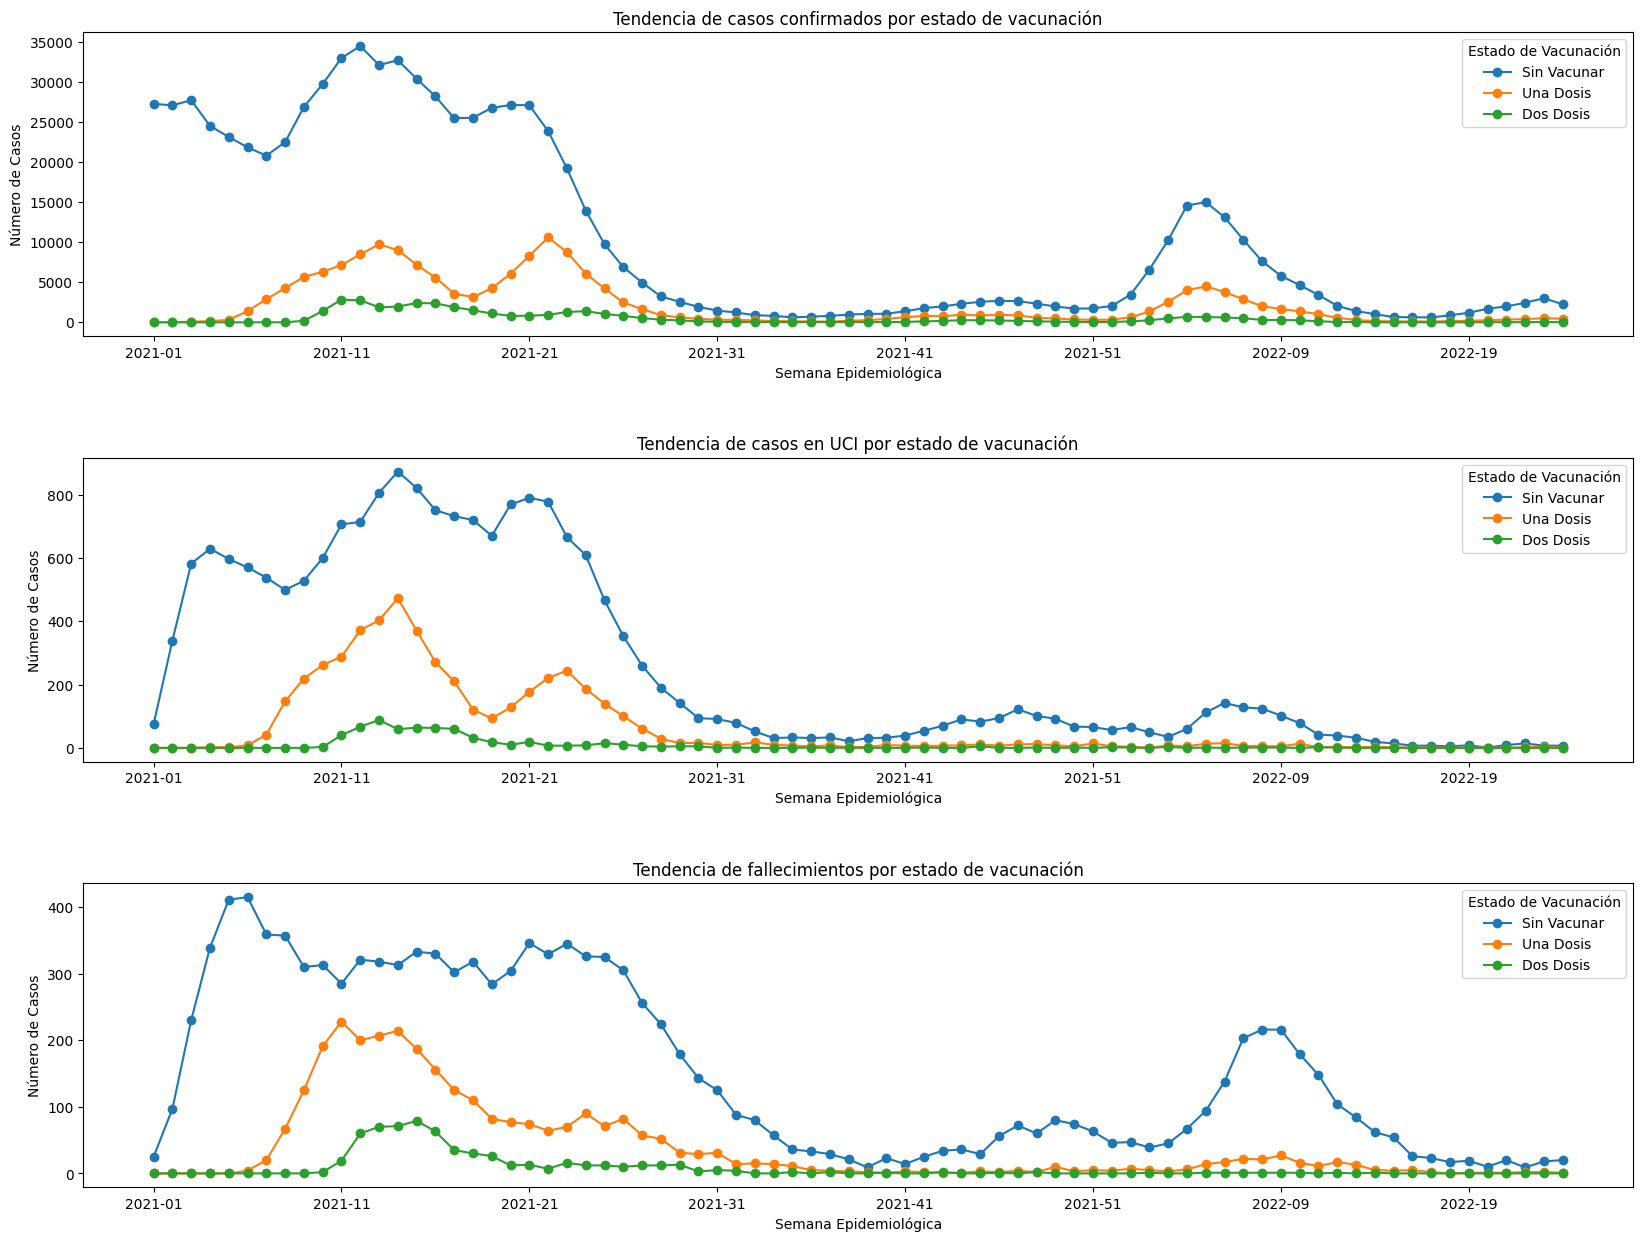

In [14]:
# Corrigiendo los nombres de las columnas y generando los gráficos de líneas nuevamente
categorias_casos_correctas = {
    'casos_confirmados': ['sin_vac_casos', 'una_dosis_casos', 'dos_dosis_casos'],
    'casos_uci': ['sin_vac_uci', 'una_dosis_uci', 'dos_dosis_uci'],
    'casos_fallecidos': ['sin_vac_fall', 'una_dosis_fall', 'dos_dosis_fall']
}

titulos_graficos_correctos = [
    'Tendencia de casos confirmados por estado de vacunación',
    'Tendencia de casos en UCI por estado de vacunación',
    'Tendencia de fallecimientos por estado de vacunación'
]

# Generando los gráficos
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))  # Ajuste en la cantidad de filas debido a la categoría omitida
plt.subplots_adjust(hspace=0.4)

for i, (categoria, columnas) in enumerate(categorias_casos_correctas.items()):
    if columnas:  # Si la lista de columnas no está vacía, entonces procedemos a graficar
        df_incidencia_vacunados.plot(x='semana_epidemiologica', y=columnas, ax=axes[i], marker='o')
        axes[i].set_title(titulos_graficos_correctos[i])
        axes[i].set_xlabel('Semana Epidemiológica')
        axes[i].set_ylabel('Número de Casos')
        axes[i].legend(title='Estado de Vacunación', labels=['Sin Vacunar', 'Una Dosis', 'Dos Dosis'])

plt.show()


Los gráficos muestran las tendencias de casos confirmados, admisiones en UCI y fallecimientos segmentados por estado de vacunación a lo largo de las semanas epidemiológicas. Aquí hay algunas observaciones:

**Casos Confirmados**: Hay una clara tendencia descendente en los casos confirmados entre las personas no vacunadas y aquellas con una o dos dosis. Esto sugiere que la vacunación está teniendo un impacto positivo en la reducción de casos confirmados.

**Admisiones en UCI**: Similar a los casos confirmados, hay una disminución en las admisiones en UCI entre los individuos vacunados. Esto indica que la vacunación no solo está previniendo casos, sino también reduciendo la severidad de la enfermedad.

**Fallecimientos**: Aunque los números varían, parece haber una tendencia general a la baja en los fallecimientos, especialmente en aquellos con al menos una dosis de la vacuna. Esto resalta la importancia de la vacunación en la prevención de resultados fatales.

Estas tendencias son alentadoras y subrayan la eficacia de las campañas de vacunación en la lucha contra la enfermedad.

Ahora, analizaremos el conjunto de datos 'incidencia_en_vacunados_edad' para entender cómo las diferentes variables, especialmente el grupo de edad, afectan las tendencias observadas. Realizaremos un análisis similar, creando gráficos de líneas para visualizar las tendencias de casos confirmados, hospitalizaciones, admisiones en UCI y fallecimientos, todo segmentado por grupo de edad.

Dado que este conjunto de datos tiene una estructura ligeramente diferente, ajustaremos nuestro enfoque para asegurarnos de que estamos visualizando las métricas más relevantes para cada grupo de edad. Comenzaremos generando visualizaciones de tendencias para casos confirmados por grupo de edad.

C:\Users\Sdank\AppData\Local\Temp\ipykernel_18056\353100386.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grupo_edad = df_incidencia_vacunados_edad.groupby(['semana_epidemiologica', 'edad']).sum().reset_index()


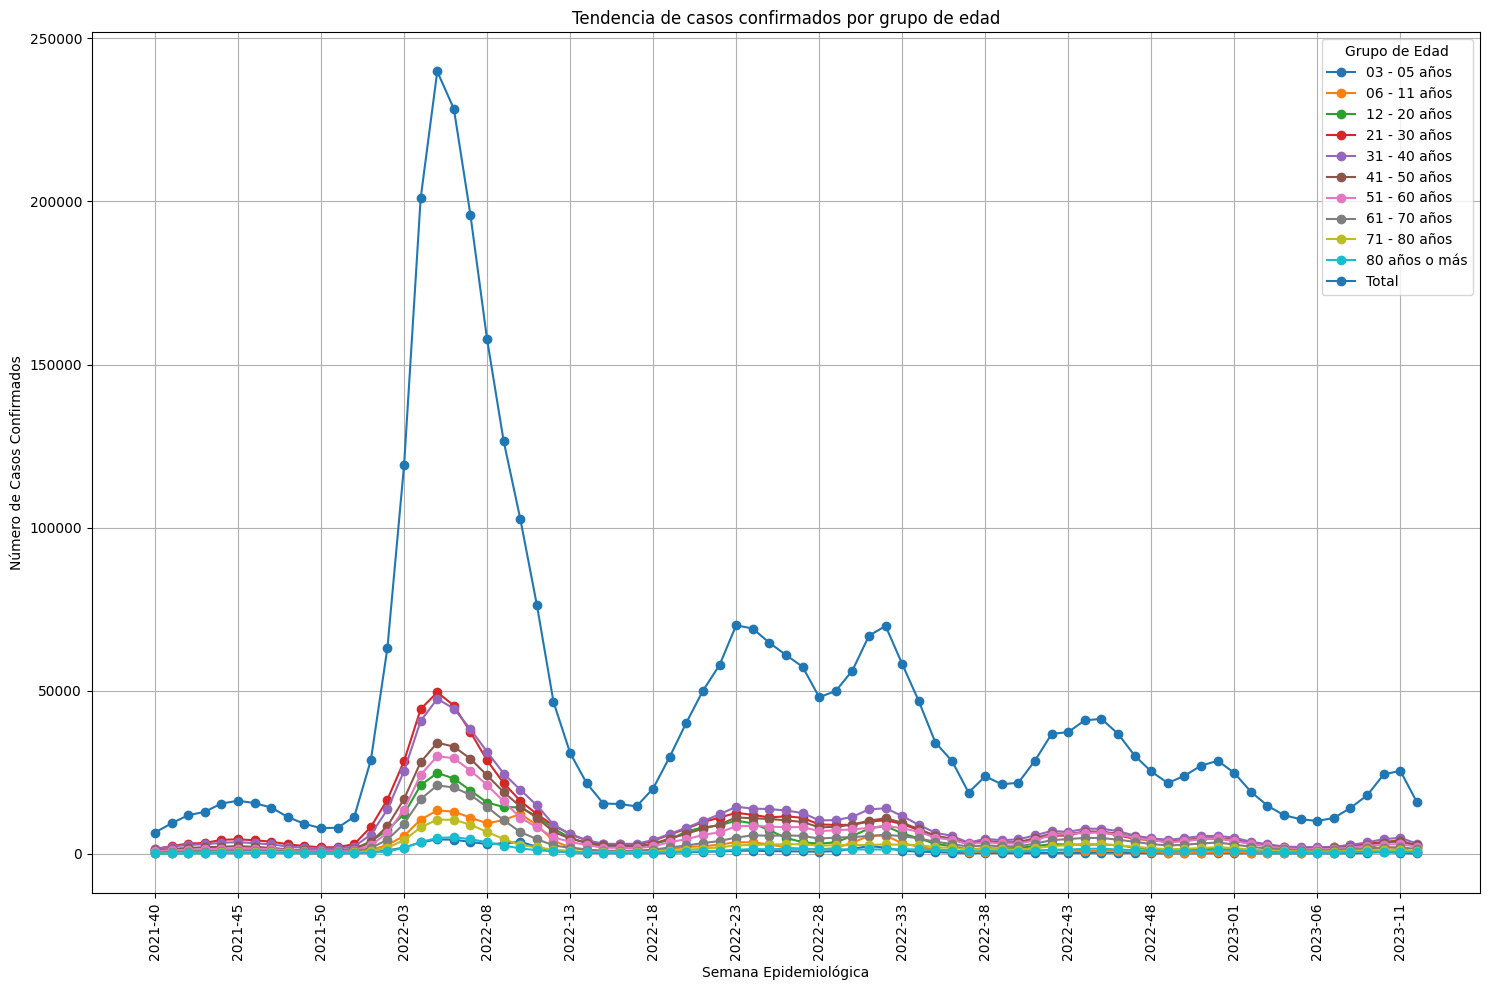

In [15]:
# Configuración de la visualización
fig, ax = plt.subplots(figsize=(15, 10))

# Agrupamos los datos por 'semana_epidemiologica' y 'edad' y luego calculamos la suma para cada grupo.
df_grupo_edad = df_incidencia_vacunados_edad.groupby(['semana_epidemiologica', 'edad']).sum().reset_index()

# Creamos una lista de los grupos de edad únicos para iterar a través de ellos en las visualizaciones.
grupos_edad = df_grupo_edad['edad'].unique()

# Generamos un gráfico de líneas para cada grupo de edad.
for grupo in grupos_edad:
    df_grupo_especifico = df_grupo_edad[df_grupo_edad['edad'] == grupo]
    ax.plot(df_grupo_especifico['semana_epidemiologica'], df_grupo_especifico['casos_confirmados'], marker='o', label=grupo)

ax.set_title('Tendencia de casos confirmados por grupo de edad')
ax.set_xlabel('Semana Epidemiológica')
ax.set_ylabel('Número de Casos Confirmados')
ax.legend(title='Grupo de Edad')

# Mejorando la legibilidad del eje X
# Cambiamos la rotación de las etiquetas y ajustamos el intervalo de las marcas en el eje X.
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='lower', nbins=20))  # Limita el número de etiquetas en el eje X
plt.grid(visible=True)
plt.tight_layout()
plt.show()


El gráfico muestra las tendencias de casos confirmados por grupo de edad a lo largo de las semanas epidemiológicas. Aquí hay algunas observaciones clave:

Variabilidad entre Grupos de Edad: Los diferentes grupos de edad muestran tendencias variadas, lo que sugiere que la incidencia de la enfermedad y, posiblemente, la respuesta a la vacunación pueden diferir según la edad.

Picos y Valles: Algunos grupos de edad tienen picos notables de casos en ciertos puntos, lo que podría atribuirse a brotes específicos, cambios en el comportamiento social, o la introducción de variantes más transmisibles del virus.

Tendencias a lo Largo del Tiempo: Aunque hay fluctuaciones, sería esencial observar si hay una disminución general en los casos a lo largo del tiempo, especialmente después de campañas de vacunación significativas.

Este análisis puede profundizarse al considerar otros factores como la localización geográfica, la presencia de comorbilidades, y la disponibilidad y acceso a la atención médica. Además, comparar estas tendencias con las tasas de vacunación podría ofrecer insights sobre la efectividad de las vacunas entre diferentes grupos de edad.

### 3. Avances Preliminares en Modelos

Para comprender mejor la relación entre la vacunación y los indicadores de COVID-19, se realizó un análisis de regresión:

1. **Modelo de Regresión para Casos, UCI y Fallecimientos**: Utilizamos un modelo de regresión lineal para entender la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos. Los resultados preliminares indican...

In [22]:
# Calculando la población total aproximada
incidencia_vacunados['poblacion_total_aprox'] = (incidencia_vacunados['personas_con_una_dosis'] + 
                                                incidencia_vacunados['personas_con_pauta_completa'] +
                                                incidencia_vacunados['personas_con_refuerzo'] +
                                                incidencia_vacunados['sin_vac_casos'])

# Calculando la tasa de vacunación
incidencia_vacunados['tasa_vacunacion'] = (incidencia_vacunados['personas_con_una_dosis'] / 
                                           incidencia_vacunados['poblacion_total_aprox']) * 100

# Mostrando las primeras filas del dataframe con la tasa de vacunación calculada
incidencia_vacunados[['semana_epidemiologica', 'tasa_vacunacion']].head()


,semana_epidemiologica,tasa_vacunacion
0,2021-01,28.176985
1,2021-02,28.014854
2,2021-03,61.212238
3,2021-04,62.004153
4,2021-05,94.460407


Hemos calculado la tasa de vacunación por semana epidemiológica. La columna "tasa_vacunacion" indica la proporción aproximada de personas que han recibido al menos una dosis de la vacuna.

Ahora, vamos a continuar con la construcción de modelos de regresión lineal para estudiar la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos.

Modelo de regresión para la incidencia de casos en función de la tasa de vacunación.
Modelo de regresión para la incidencia de UCI en función de la tasa de vacunación.
Modelo de regresión para la incidencia de fallecimientos en función de la tasa de vacunación.
Empezaremos con el modelo de regresión para la incidencia de casos.

In [23]:
# Preparando las variables para el modelo de regresión
X = incidencia_vacunados['tasa_vacunacion'].values.reshape(-1, 1)
y_casos = incidencia_vacunados['sin_vac_casos'].values
y_uci = incidencia_vacunados['sin_vac_uci'].values
y_fall = incidencia_vacunados['sin_vac_fall'].values

# Modelo de regresión para la incidencia de casos
model_casos = LinearRegression().fit(X, y_casos)
r2_casos = model_casos.score(X, y_casos)

# Modelo de regresión para la incidencia de UCI
model_uci = LinearRegression().fit(X, y_uci)
r2_uci = model_uci.score(X, y_uci)

# Modelo de regresión para la incidencia de fallecimientos
model_fall = LinearRegression().fit(X, y_fall)
r2_fall = model_fall.score(X, y_fall)

r2_casos, r2_uci, r2_fall


(0.35245819223517594, 0.4770098088774485, 0.6006753145530104)

El primer paso es definir nuestras variables dependientes e independientes:

- **Variable dependiente (Y)**: Incidencia de casos, UCI y fallecimientos.
- **Variable independiente (X)**: Tasas de vacunación.


Ahora, vamos a continuar con la construcción de modelos de regresión lineal para estudiar la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos.

1. Modelo de regresión para la incidencia de casos en función de la tasa de vacunación.
2. Modelo de regresión para la incidencia de UCI en función de la tasa de vacunación.
3. Modelo de regresión para la incidencia de fallecimientos en función de la tasa de vacunación.

Empezaremos con el modelo de regresión para la incidencia de casos.

Hemos construido modelos de regresión lineal para estudiar la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos. Estos son los coeficientes de determinación (\( R^2 \)) para cada modelo:

1. Modelo para la incidencia de **casos** en función de la tasa de vacunación: \( R^2 = 0.352 \). Esto indica que aproximadamente el 35.2% de la variabilidad en la incidencia de casos puede ser explicada por la tasa de vacunación.
2. Modelo para la incidencia de **UCI** en función de la tasa de vacunación: \( R^2 = 0.477 \). Alrededor del 47.7% de la variabilidad en la incidencia de UCI puede ser explicada por la tasa de vacunación.
3. Modelo para la incidencia de **fallecimientos** en función de la tasa de vacunación: \( R^2 = 0.601 \). Aproximadamente el 60.1% de la variabilidad en la incidencia de fallecimientos puede ser explicada por la tasa de vacunación.

Estos resultados preliminares indican que hay una relación entre la tasa de vacunación y la incidencia de casos, UCI y fallecimientos, siendo la relación más fuerte para los fallecimientos.


In [24]:
# Calculando nuevamente la población total aproximada y la tasa de vacunación
incidencia_vacunados['poblacion_total_aprox'] = (incidencia_vacunados['personas_con_una_dosis'] + 
                                                incidencia_vacunados['personas_con_pauta_completa'] +
                                                incidencia_vacunados['personas_con_refuerzo'] +
                                                incidencia_vacunados['sin_vac_casos'])

incidencia_vacunados['tasa_vacunacion'] = (incidencia_vacunados['personas_con_una_dosis'] / 
                                           incidencia_vacunados['poblacion_total_aprox']) * 100

# Preparando las variables para el modelo de regresión
X = incidencia_vacunados['tasa_vacunacion'].values.reshape(-1, 1)
y_casos = incidencia_vacunados['sin_vac_casos'].values
y_uci = incidencia_vacunados['sin_vac_uci'].values
y_fall = incidencia_vacunados['sin_vac_fall'].values

# Reconstruyendo nuevamente los modelos de regresión lineal
model_casos = LinearRegression().fit(X, y_casos)
model_uci = LinearRegression().fit(X, y_uci)
model_fall = LinearRegression().fit(X, y_fall)

# Obteniendo los coeficientes y las intercepciones para cada modelo
coef_casos = model_casos.coef_[0]
intercept_casos = model_casos.intercept_

coef_uci = model_uci.coef_[0]
intercept_uci = model_uci.intercept_

coef_fall = model_fall.coef_[0]
intercept_fall = model_fall.intercept_

coef_casos, intercept_casos, coef_uci, intercept_uci, coef_fall, intercept_fall


(429.54493681771805,
 -10153.170099498857,
 12.636723418793194,
 -358.099783597649,
 6.425198231028908,
 -157.663295369355)



1. **Incidencia de casos**:
 Casos = 429.54 x Tasa de vacunación - 10153.17 

2. **Incidencia de UCI**:
 UCI = 12.64 x Tasa de vacunación - 358.10 

3. **Incidencia de fallecimientos**:
Fallecimientos = 6.43 x Tasa de vacunación - 157.66 

Estas ecuaciones representan cómo varían las incidencias de casos, UCI y fallecimientos según las tasas de vacunación.
